In [1]:
from climada.hazard import Centroids
import cartopy.crs as ccrs
from pyproj.crs.crs import CRS
from climada.util.constants import DEF_CRS
import matplotlib.pyplot as plt

/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 13.0.0. Please consider upgrading.
  warnings.warn(


## Testing default case

<GeoAxes: >

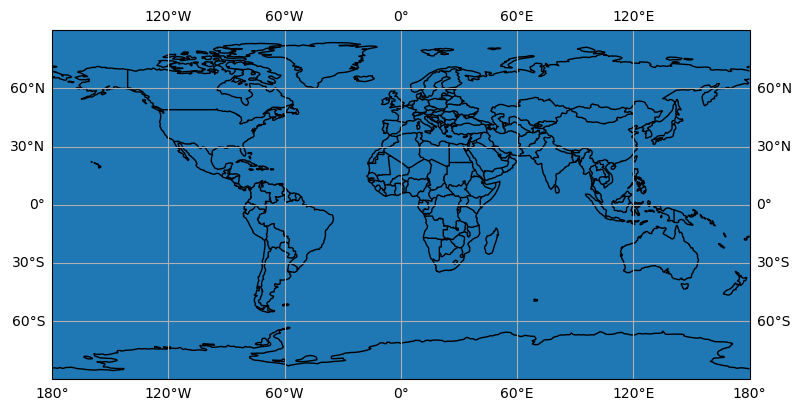

In [2]:
centroids = Centroids.from_hdf5('/Users/shuelsen/ETH/ETH_PhD/research/Hazomes/data/centroids_05deg.hdf5')
centroids.plot()

## Testing for centroids with crs != DEF_CRS

<GeoAxes: >

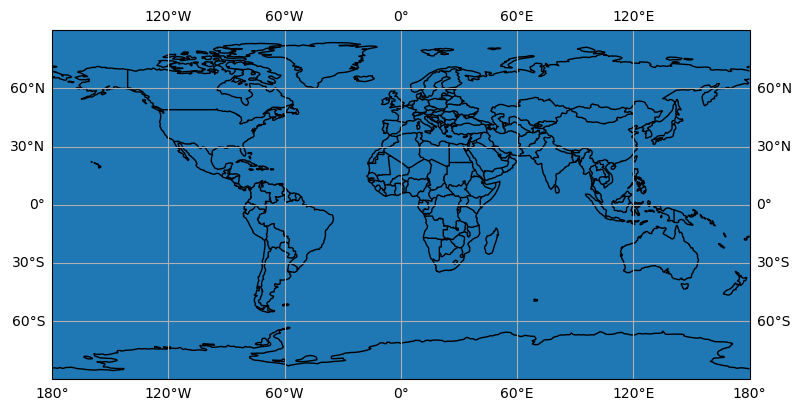

In [3]:
centroids = centroids.to_crs('+proj=moll +lon_0=0 +x_0=0 +y_0=0 +R=6371000 +units=m +no_defs +type=crs')
centroids.plot()

## Testing for plotting on user-defined axis

<GeoAxes: >

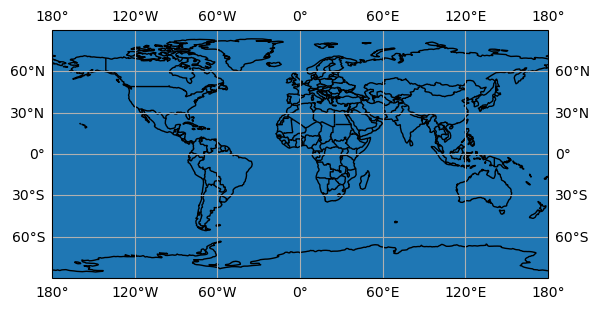

In [4]:
fig, axis = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
centroids.plot(axis=axis)

## Testing for plotting with different projection
Throws a bunch of warnings. I believe these are related to the known shapely issues in newer versions of climada, not to the function not working as intended (the plot looks good).

/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/sh

<GeoAxes: >

/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages

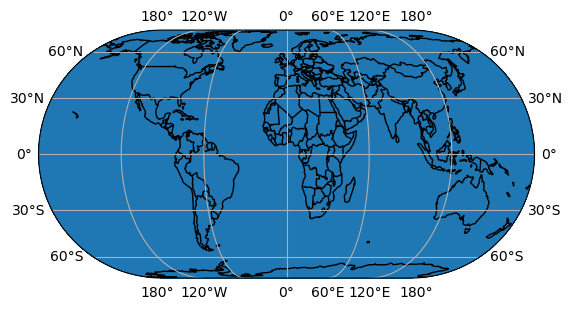

In [5]:
fig, axis = plt.subplots(subplot_kw={"projection": ccrs.EckertIV()})
centroids.plot(axis=axis)

## Testing for error if wrong axis type is provided
Should yield error: AttributeError: The axis provided is of type: type(axis). The function requires a cartopy.mpl.geoaxes.GeoAxes.

AttributeError: The axis provided is of type: <class 'matplotlib.axes._axes.Axes'> The function requires a cartopy.mpl.geoaxes.GeoAxes.

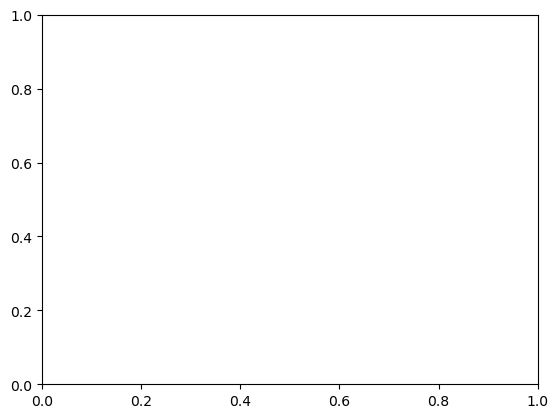

In [6]:
fig, axis = plt.subplots()
centroids.plot(axis=axis)